# Лінійна регресія

&emsp;&emsp;Лінійна регресія – статистична модель, у якій залежна (цільова) змінна представлена як лінійна комбінація кількох незалежних змінних + випадкова помилка, середнє значення якої дорівнює 0:

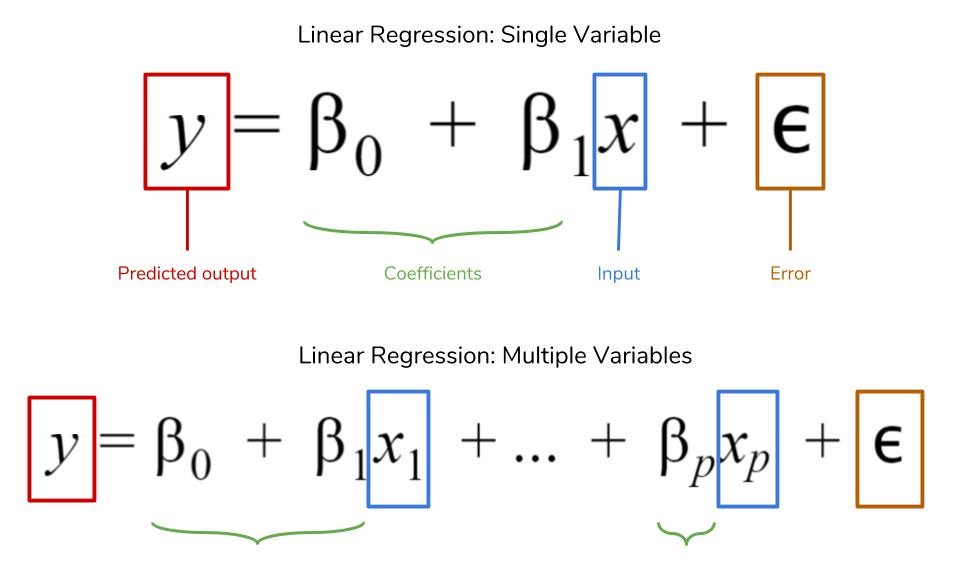

&emsp;&emsp;Для того, щоб дати прогноз із такої моделі, необхідно знайти оптимальне значення для p коефіцієнтів (за наявності p змінних) і, опціонально, значення константи. Для початку припустимо, що у нас є залежність змінної у від єдиної змінної х. Якщо зобразити всі точки (х, у) на графіку, то модель лінійної регресії буде виглядати як пряма, що залежить від х.

![title](LinearRegressionChart.png)

&emsp;&emsp;Для того, щоб задати цю пряму нам необхідно знати урівнювання прямо як y = a + bx. При цьому ми хочемо, щоб відхилення фактичних (спостережуваних) значень було мінімальним. Іншими словами, щоб знайдена пряма проходила як можна ближче до всіх точок (х, у).

&emsp;&emsp;Понятие “ближе” ми можемо визначити через помилку: відхилення фактичного значення від прогнозованого. Оскільки знак помилки (вище або нижче пройшла пряма) нам неважливий, то помилку є сенс привести в квадрат (це упростить обислення). Нарешті, можна знайти параметри моделі мінімізуючи помилки середнього квадрата:

$$error = \frac{1}{n}\sum_{i=1}^{n}{(y_{i} - w^{T}x_{i})^{2}} = \frac{1}{n}\sum_{i=1}^{n}{(y_{i} - (\beta_0 +\beta_1 x_i))^{2}}$$
$$w = argmin[error] = argmin \frac{1}{n}\sum_{i=1}^{n}{(y_{i} - w^{T}x_{i})^{2}}$$

&emsp;&emsp;Побудуємо нашу першу модель. Для початку прочитаємо дані, з якими будемо працювати з файлу.

In [49]:
import pandas as pd
import numpy as np

data = pd.read_csv('RealEstate.csv', sep=',', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [50]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


&emsp;&emsp;Почати є сенс з того, що переглянути, як дані пов’язані з залежною змінною. Для цього зазвичай використовуються точкові графіки (діаграма розсіювання):

In [51]:
from matplotlib import pyplot as plt

def show_scatter_plot(x, y): 
    b1, b0 = np.polyfit(x, y, deg=1)
    print(b1)
    plt.scatter(x, y)
    plt.plot(x, b0+b1*x, c='red')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

-0.25148841908534375


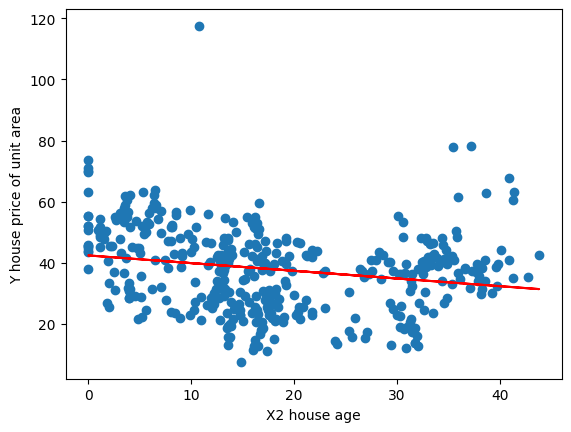

In [52]:
show_scatter_plot(data['X2 house age'], data['Y house price of unit area'])

In [53]:
np.corrcoef(data['X2 house age'], data['Y house price of unit area'])

array([[ 1.    , -0.2106],
       [-0.2106,  1.    ]])

&emsp;&emsp;Схоже, що до якогось порога ціна на будинок падає зі зростанням віку, а після тенденція розвертається.

-0.007262051618149424


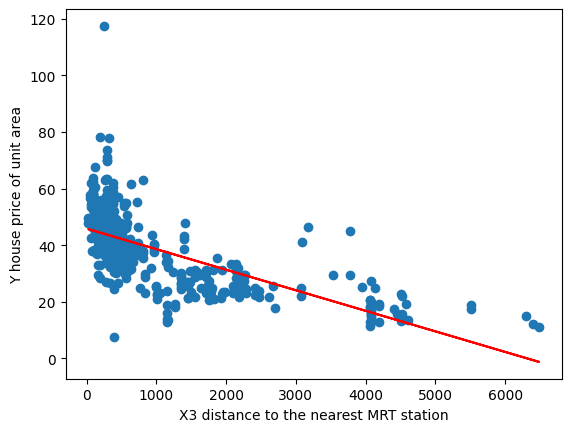

In [54]:
show_scatter_plot(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'])

In [55]:
np.corrcoef(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'])

array([[ 1.    , -0.6736],
       [-0.6736,  1.    ]])

&emsp;&emsp;Очевидно, що чим більша відстань, тим дешевше будинок.

2.6376534634043742


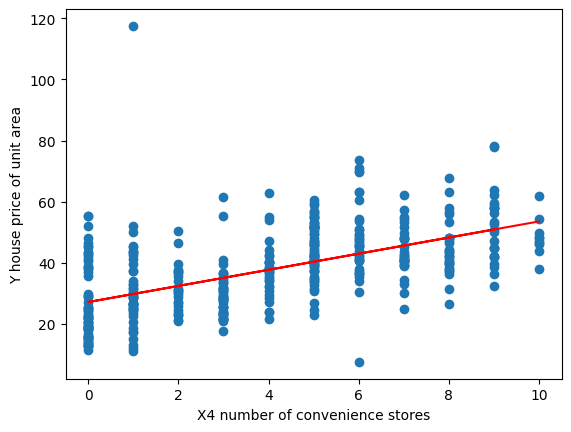

In [56]:
show_scatter_plot(data['X4 number of convenience stores'], data['Y house price of unit area'])

In [57]:
np.corrcoef(data['X4 number of convenience stores'], data['Y house price of unit area'])

array([[1.   , 0.571],
       [0.571, 1.   ]])

&emsp;&emsp;Очевидно, що чим більше магазинів навколо, тим вища вартість квадратного метра житла.

4.221908398206527


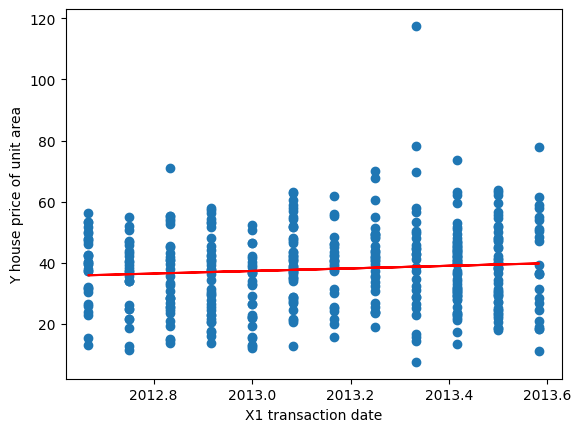

In [58]:
show_scatter_plot(data['X1 transaction date'], data['Y house price of unit area'])

In [59]:
np.corrcoef(data['X1 transaction date'], data['Y house price of unit area'])

array([[1.    , 0.0875],
       [0.0875, 1.    ]])

&emsp;&emsp;Схоже, що з часом нерухомість схильна дорожчати.

&emsp;&emsp;Модель лінійної регресії визначена як:

$$y = c + Xb + e$$

&emsp;&emsp;Виберемо з даних наш Х і у:

In [60]:
X = data[['X2 house age', 'X3 distance to the nearest MRT station',
          'X4 number of convenience stores', 'X1 transaction date']]

y = data['Y house price of unit area'].values

&emsp;&emsp;Зазвичай, прийнято розбивати дані на 2 підгрупи: одну для навчання моделі, а іншу для оцінки її якості:

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, # перший масив, який потрібно розбити
    y, # другий масив, який потрібно розбити
    test_size=0.2, # розмір меншої групи (20% від загальної кількості даних)
    random_state=42 # фіксація випадкового стану: тепер при перезапуску групи будуть однаковими
)

print('Розмір вибірки для навчання:', len(X_train))
print('Розмір вибірки для тестування:', len(X_test))

Розмір вибірки для навчання: 331
Розмір вибірки для тестування: 83


&emsp;&emsp;Тепер все готове, для побудови самої моделі:

In [62]:
from sklearn.linear_model import LinearRegression

# ініціалізація моделі
mdl = LinearRegression(
    fit_intercept=True # чи включити в модель константу "с" з формули вище
)

# навчання моделі
mdl = mdl.fit(X_train, y_train)

&emsp;&emsp;Маючи навчену модель можемо подивитися на коефіцієнти при змінних:

In [63]:
for var_name, coef_value in zip(X.columns, mdl.coef_):
    print(var_name, ': ', coef_value)
    
print('constant term: ', mdl.intercept_)

X2 house age :  -0.25873135874285463
X3 distance to the nearest MRT station :  -0.005618761117618779
X4 number of convenience stores :  1.2305269209874512
X1 transaction date :  5.771195016537925
constant term:  -11574.659717124114


&emsp;&emsp;Тепер нам залишається оцінити, наскільки добре наша модель передбачає значення для тих даних, які вона ще не бачила. Зазвичай для таких моделей користуються середньоквадратичною помилкою:

$$MSE = mean((y_{actual} - y_{predicted})^2)$$

&emsp;&emsp;Також цікаво буде порівняти, наскільки краще ми прогнозуємо, ніж просто даючи середнє значення.

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error

mean_forecast = np.ones_like(y_test) * np.mean(y_train) # прогноз, опосередкований на середньому значенні
model_forecast = mdl.predict(X_test) # прогноз, заснований на нашій моделі

print('Помилка прогнозу, при середньому значенні:', mean_squared_error(y_test, mean_forecast))
print('Помилка прогнозу з використанням моделі: ', mean_squared_error(y_test, model_forecast))

Помилка прогнозу, при середньому значенні: 171.96955286723147
Помилка прогнозу з використанням моделі:  56.11619009787712


&emsp;&emsp;Часто буває так, що модель ідеально описує дані, на яких вона навчалася. Тобто помилка на навчальному наборі дуже мала, але при тестуванні виявляється, що модель дає дуже погані прогнози. Цей ефект називається перенавчанням (overfitting) і свідчить, що модель має дуже низьку здатність до узагальнення.

&emsp;&emsp;Порівняємо, як відрізняється помилка на навчальному та тестовому наборі:

In [65]:
y_train_forecast = mdl.predict(X_train)

print('Помилка на навчальних даних: ', mean_squared_error(y_train, y_train_forecast))
print('Помилка тестових даних: ', mean_squared_error(y_test, model_forecast))

Помилка на навчальних даних:  88.67343466262646
Помилка тестових даних:  56.11619009787712


&emsp;&emsp;У нашому випадку, тестові дані виявилися навіть більш передбачуваними - помилка моделі на них менша, ніж при навчанні. Можна сказати, що модель не була перенавчена.

In [66]:
mdl.predict([X_train.iloc[0].values]), y_train[0]

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([40.6773]), 42.7)

Folium
https://python-visualization.github.io/folium/

# Логістична регресія

&emsp;&emsp;Логістична регресія – це статистична модель, схожа на лінійну регресію, але застосовується у разі, коли залежна змінна приймає лише 2 можливі значення (зазвичай 0 і 1). У такій ситуації, очевидно, формулювати модель як лінійну комбінацію пояснюючих змінних некоректно: лінійна комбінація, залежно від значень змінних, може набувати як негативних, так і значень набагато більше 1:

![title](LinearVSLogistic1.png)

&emsp;&emsp;Усунути цю некоректність можна застосувавши до лінійної комбінації функцію, яка набуває значення в інтервалі від 0 до 1. У такому разі, результат моделі можна інтерпретувати як ймовірність того, що y прийме значення 1. Найзручнішою функцією, що відповідає даній вимогі, є логістична:

$$f(x) = \frac{1}{1 + e^{-x}}$$

&emsp;&emsp;Тоді формулу ймовірності позитивного результату можна записати як:

$$P(y_{i}=1) = p_{i} = \frac{1}{1 + e^{-w^{T}x_{i}}}$$

&emsp;&emsp;Ймовірність кожного спостереження зручно записувати в наступному вигляді:

$$P(y_{i}) = p_{i}^{y_{i}}(1 - p_{i})^{1 - y_{i}}$$

&emsp;&emsp;Тоді можемо записати функцію правдоподібності для моделі та знайти параметри як

$$w = argmax\prod_{i=1}^{n}{p_{i}^{y_{i}}(1 - p_{i})^{1 - y_{i}}}$$

&emsp;&emsp;Більшість моментів, описаних вище для лінійної регресії підходять і для логістичної. Наприклад, побудуємо модель, яка оцінює можливість виживання на Титаніці.

In [67]:
data = pd.read_csv('TitanicDataset.csv', sep=',', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


&emsp;&emsp;Побудуємо модель, яка залежить від статі, віку та ціни квитка. Для цього замінимо значення статі з 'male/female' на 1/0 (при побудові моделі дозволені лише числові змінні) та проігноруємо тих пасажирів, вік яких невідомий:

In [68]:
data = data[~pd.isna(data['Age'])].copy() # ігноруємо пасажирів, для яких не знаємо вік
data['Sex'] = np.where(data['Sex'] == 'male', 1, 0) # заміна статі на число
X, y = data[['Age', 'Sex', 'Fare']], data['Survived'].values # створення набору даних

&emsp;&emsp;Як і минулого разу, розіб'єм дані на навчальну та тестову групу:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # перший масив, який потрібно розбити
    y, # другий масив, який потрібно розбити
    test_size=0.2, # розмір меншої групи (20% від загальної кількості даних)
    random_state=12 # фіксація випадкового стану: тепер при перезапуску групи будуть однаковими
)

print('Розмір вибірки для навчання:', len(X_train))
print('Розмір вибірки для тестування:', len(X_test))

Розмір вибірки для навчання: 571
Розмір вибірки для тестування: 143


&emsp;&emsp;Побудова моделі:

In [70]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression(fit_intercept=True).fit(X_train, y_train)

&emsp;&emsp;Подивимося, які вийшли коефіцієнти:

In [71]:
for var_name, coef_value in zip(X.columns, mdl.coef_[0]):
    print(var_name, ': ', coef_value)

Age :  -0.007751781398108924
Sex :  -2.29100560140601
Fare :  0.01229203235877044


Можна провести наступний аналіз коефіцієнтів:

- Негативне значення при віці означає, що чим старший пасажир, тим менше шансів на виживання
- Негативне значення при полі, де в нашому кодуванні 1 - це чоловік, 0 - жінка, означає, що у чоловіків менше шансів, ніж у жінок
- позитивне значення при ціні квитка означає, що чим дорожчий квиток, тим більше шансів на виживання

&emsp;&emsp;Тепер оцінимо точність нашої моделі:

In [72]:
from sklearn.metrics import accuracy_score

predictions = mdl.predict(X_test) # отримаємо прогнози з моделі
print('Оцінна точність: ', accuracy_score(y_test, predictions))

Оцінна точність:  0.7762237762237763


&emsp;&emsp;Модель також дозволяє отримати оцінку ймовірності виживання:

In [73]:
ps = mdl.predict_proba(X_test)[:, 1]
print('фактичні результати:', y_test[:5])
print('оцінки ймовірностей: ', ps[:5])
print(predictions[:5])

фактичні результати: [1 0 0 0 1]
оцінки ймовірностей:  [0.7078 0.1757 0.1789 0.176  0.2675]
[1 0 0 0 0]


# Метрики оцінки якості

&emsp;&emsp;Метрикою називається будь-яка функція, якою можна оцінити якість роботи моделі. У прикладі вище за нашу метрику була точність.

&emsp;&emsp;Не слід плутати метрику з функцією втрат: функція втрат, це та функція, яка безпосередньо мінімізується при пошуку оптимального значення параметрів. Що стосується логістичної регресією - це -1 помножити на функцію правдоподібності такий моделі (logistic loss). Метрики часто не мають похідних, тому знаходити їх мінімум відразу немає можливості. Наприклад, точність мінімізувати не можна.

&emsp;&emsp;В окремих випадках метрика може збігатися з функцією втрат, як це було для MSE лінійної регресії. В інших ситуаціях, якщо є така можливість, функцію втрат слід вибирати так, щоб вона якомога сильніше була пов'язана з метрикою: що менше функція втрат, то більше метрика і навпаки (якщо метрика зі зростанням якості зростає).

&emsp;&emsp;У задачах класифікації точність як метрика далеко не завжди є найкращим вибором. Наприклад, якщо позитивні результати даних становлять лише 5%, то навіть без будь-якої моделі можна отримати точність 95%, просто сказавши, що всі результати позитивні. Такого типу дані називаються незбалансованими (тобто коли одного типу прикладів набагато менше, ніж інших).

Перед тим, як перейти до інших популярних метриків, визначимо деякі терміни:

TP (true positive) – позитивні приклади, які були класифіковані моделлю як позитивні

FP (false positive) – негативні приклади, які були класифіковані моделлю як позитивні

TN (true negative) – негативні приклади, які були класифіковані моделлю як негативні

FN (false negative) – позитивні приклади, які були класифіковані моделлю як негативні 

&emsp;&emsp;Часто ці 4 величини зображують у вигляді таблиці:

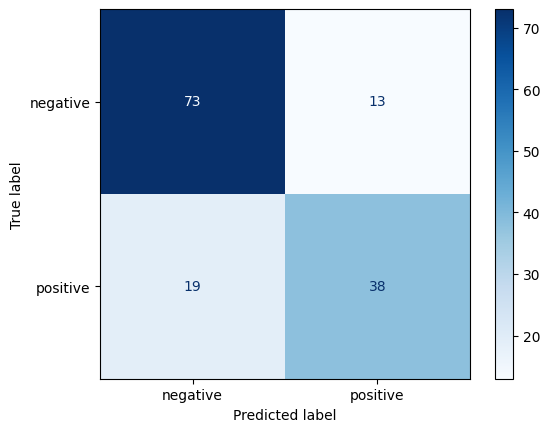

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    #normalize='true',
    estimator=mdl, # навчена модель, яка дає прогнози
    X=X_test, # дані, котрим потрібно дати прогноз
    y=y_test, # значення цільової змінної
    display_labels=['negative', 'positive'], # назви класів
    cmap=plt.cm.Blues, # кольорова гама картинки
)

plt.show()

&emsp;&emsp;Користуючись запропонованими вище термінами, можемо записати точність моделі як:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

&emsp;&emsp;Метрика precision визначає наскільки добре модель вгадує позитивні результати:

$$Precision = TP / (TP + FP)$$

&emsp;&emsp;Ця метрика знаходиться в інтервалі від 0 до 1 і набуває значення 1 тільки якщо всі приклади, які були класифіковані моделлю як позитивні дійсно позитивні.

&emsp;&emsp;Метрика recall визначає, як часто модель відкидає позитивні приклади:

$$Recall = TP / (TP + FN)$$

&emsp;&emsp;Recall теж знаходиться в інтервалі від 0 до 1 і набуває значення 1 тільки тоді, коли модель змогла знайти всі позитивні приклади даних.

&emsp;&emsp;Запропоновані вище метрики precision/recall залежать один від одного: збільшуючи значення однієї зазвичай зменшується значення іншої і навпаки.

&emsp;&emsp;Для того, щоб знайти оптимальний баланс їх часто об'єднують в одну: F1 score

$$F_{1} = 2 \cdot \frac {precision \cdot recall} {precision + recall}$$

&emsp;&emsp;Знайдемо значення запропонованих вище метрик для нашої моделі:

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision: ', precision_score(y_test, predictions))
print('recall: ', recall_score(y_test, predictions))
print('F1', f1_score(y_test, predictions))

precision:  0.7450980392156863
recall:  0.6666666666666666
F1 0.7037037037037038


&emsp;&emsp;Більшість моделей (логістична регресія в тому числі) спочатку видають ймовірність настання події, а не сам клас. Тобто для того, щоб зрозуміти чи позитивний приклад, ми повинні порівняти значення ймовірності на виході з деяким порогом: якщо P(1) > 0.5 - приклад позитивний, інакше негативний.

&emsp;&emsp;Такий поріг далеко не завжди очевидний і для деяких додатків може становити 0.99 або 0.05. Добре було б мати таку метрику, що від цього порога не залежить.

&emsp;&emsp;Визначимо такі терміни:

$$TPR \text{ (true positive rate)} = recall = TP / (TP + FN)$$

$$FPR \text{ (false positive rate)} = FP / (FP + TN)$$

&emsp;&emsp;Ми можемо вважати значення цих метрик для багатьох порогових значень між 0 і 1

In [76]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, ps)

In [77]:
thresholds[1:]

array([0.9796, 0.9646, 0.9236, 0.7632, 0.7596, 0.7487, 0.7439, 0.7216,
       0.7193, 0.7139, 0.7114, 0.6897, 0.6845, 0.669 , 0.6689, 0.6682,
       0.6579, 0.6442, 0.2698, 0.2642, 0.2549, 0.2464, 0.2297, 0.2045,
       0.1963, 0.1953, 0.1837, 0.1834, 0.1805, 0.18  , 0.1772, 0.177 ,
       0.1763, 0.173 , 0.1727, 0.1726, 0.1721, 0.1708, 0.1706, 0.1689,
       0.1686, 0.1664, 0.1656, 0.1532, 0.153 , 0.1471])

&emsp;&emsp;Чим більше порогове (threshold) значення для ухвалення рішення, тим менше TPR через те, що модель починає видавати все менше позитивних результатів:

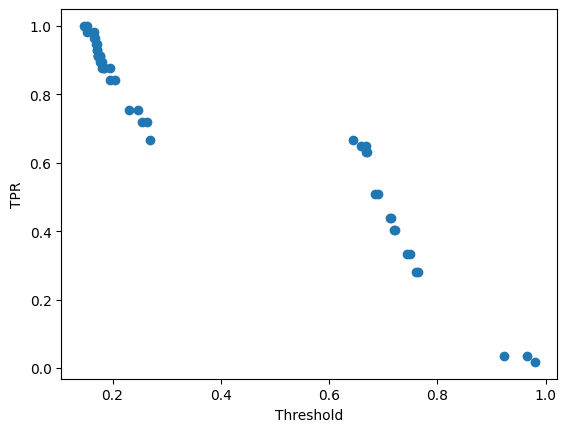

In [78]:
plt.scatter(thresholds[1:], tpr[1:])
plt.xlabel('Threshold')
plt.ylabel('TPR')
plt.show()

&emsp;&emsp;З іншого боку, з тієї ж причини менше і хибнопозитивних результатів:

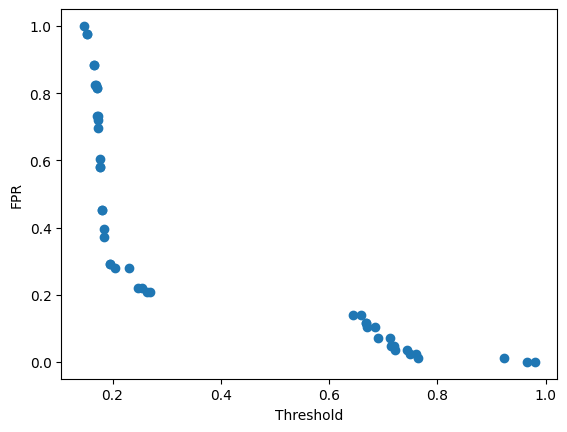

In [79]:
plt.scatter(thresholds[1:], fpr[1:])
plt.xlabel('Threshold')
plt.ylabel('FPR')
plt.show()

&emsp;&emsp;Для візуального аналізу зручніше побудувати графік залежності TPR від FPR. Така залежність називається ROC (receiver operating characteristic) крива:

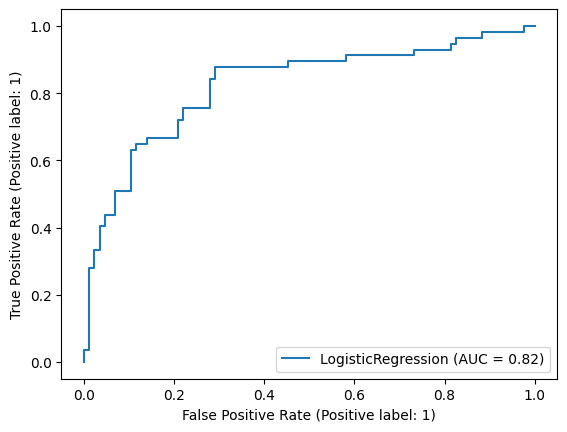

In [80]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
     estimator=mdl, # навчена модель, яка видає ймовірність позитивного результату
     X=X_test, # дані, для яких потрібно отримати прогноз
     y=y_test # фактичні значення залежної змінної
)

plt.show()

&emsp;&emsp;Якщо модель навчена правильно, то TPR повинен випереджати у зростанні FPR на ROC графіку. Тобто для деякого порога частка хибнопозитивних результатів складає всього 20% від частки правильно розпізнаних ~65%.

&emsp;&emsp;Як метрику в даному випадку прийнято використовувати площу фігури під ROC кривою: AUC (area under curve). У нашому випадку AUC дорівнює 0.82

In [81]:
from sklearn.metrics import roc_auc_score

print('model AUC: ', roc_auc_score(y_test, ps))

model AUC:  0.8237454100367196


&emsp;&emsp;Фізичний зміст AUC полягає у здатності моделі відсортувати події за ймовірністю їх настання.

# Класифікація у випадку кількох класів

&emsp;&emsp;Часто виникає завдання, в якій залежна змінна набуває значень з деякої множини. Прикладом може бути завдання класифікації ірисів на основі параметрів квітки:

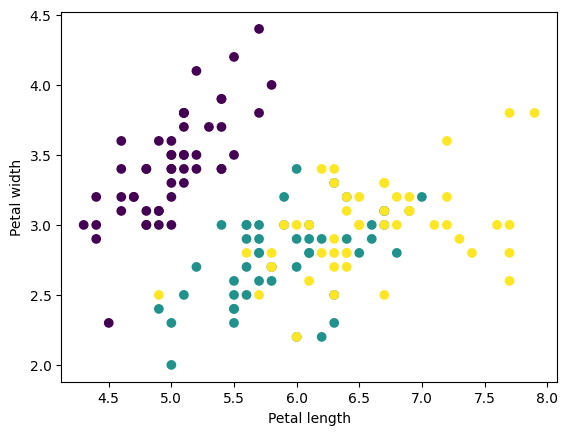

In [82]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2] # візьмемо тільки перші 2 колонки, які відповідають довжині та ширині пелюстки
y = iris.target # залежна змінна приймає 3 можливі значення, що відповідають виду ірису

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [83]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

&emsp;&emsp;Популярна стратегія для оцінки ймовірностей кожного виду - це побудувати по одній моделі бінарної класифікації (наприклад, логістичної регресії) для кожного класу окремо. При цьому клас, для якого зараз будується модель, замінюється на 1, а всі інші на 0. Стратегія називається OvR (one-vs-rest):

In [84]:
# ініціалізуємо порожній масив, в якому зберігатимемо прогнози для кожної моделі
probs = np.empty((len(X), 3)) # розмірність відповідає кількості прикладів на кількість моделей

# далі пройдемося циклом по всіх можливих значеннях цільової змінної (по кожному класу)
for i, current_class in enumerate(set(y)):
    
    # створимо нову змінну, яка набуває значення 1, коли y=class, і 0 інакше
    pseudo_y = np.where(y == current_class, 1, 0)
    
    # навчимо модель для даного класу
    current_model = LogisticRegression().fit(X, pseudo_y)
    
    # додамо прогноз поточної моделі до матриці прогнозів
    probs[:, i] = current_model.predict_proba(X)[:, 1]

# оскільки моделі не знають про існування один одного з ймовірності буде ненормалізованими,
# а оскільки сума ймовірностей повинна бути 1, то ми повинні нормалізувати їх вручну
probs /= np.sum(probs, axis=1).reshape((-1, 1))

np.set_printoptions(suppress=False, precision=4)
print(probs[:10])

[[0.8436 0.1113 0.0452]
 [0.694  0.2701 0.0359]
 [0.8014 0.1783 0.0203]
 [0.7776 0.2057 0.0167]
 [0.878  0.0877 0.0343]
 [0.8802 0.0488 0.071 ]
 [0.8629 0.1219 0.0152]
 [0.8296 0.1328 0.0376]
 [0.7253 0.2636 0.0111]
 [0.7389 0.2269 0.0342]]


&emsp;&emsp;Можна обійтися і вбудованими методами:

In [85]:
mdl = LogisticRegression(multi_class='ovr').fit(X, y)
print(mdl.predict_proba(X)[:10])

[[0.8436 0.1113 0.0452]
 [0.694  0.2701 0.0359]
 [0.8014 0.1783 0.0203]
 [0.7776 0.2057 0.0167]
 [0.878  0.0877 0.0343]
 [0.8802 0.0488 0.071 ]
 [0.8629 0.1219 0.0152]
 [0.8296 0.1328 0.0376]
 [0.7253 0.2636 0.0111]
 [0.7389 0.2269 0.0342]]


&emsp;&emsp;Багато розглянутих вище метриків якості для оцінки мультикласової моделі вимагають певних агрегацій. Розглянемо приклад із precision. Для цього розрахуємо кількість TP/FP кожного класу окремо.

In [86]:
tp_fp = []
predictions = np.argmax(probs, axis=1)  # виберемо класом найімовірніший варіант
for curr_class in set(y):
    
    # порахуємо кількість TP/FP для кожного класу і додамо до списку разом з номером класу
    tp = len(predictions[(predictions == curr_class) & (y == curr_class)])
    fp = len(predictions[(predictions == curr_class) & (y != curr_class)])
    tp_fp.append([curr_class, tp, fp])
    
print(tp_fp)
    

[[0, 49, 1], [1, 33, 12], [2, 39, 16]]


In [87]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

&emsp;&emsp;Перший варіант (макро середнє) це порахувати precision окремо для кожного класу і усереднити:

In [88]:
individual_precisions = [e[1] / sum(e[1:]) for e in tp_fp]
macro_precision = np.mean(individual_precisions)
print('individual precisions: ', individual_precisions)
print('macro precision: ', macro_precision)

individual precisions:  [0.98, 0.7333333333333333, 0.7090909090909091]
macro precision:  0.8074747474747475


&emsp;&emsp;Проте такий підхід не враховує незбалансованість даних. Наприклад, у нас могла бути ситуація, коли в одного класу precision = 0.99, але цього класу тільки 10 прикладів, а в іншого precision = 0.5, але він становить 70 прикладів. В такому випадку може бути краще вважати precision як відношення загальної кількості TP на загальне TP + FP:

In [89]:
total_tp = sum([e[1] for e in tp_fp])
total_fp = sum([e[2] for e in tp_fp])

print('micro precision: ', total_tp / (total_tp + total_fp))

micro precision:  0.8066666666666666


&emsp;&emsp;Альтернативно ми можемо порахувати всі подібні метрики за допомогою вбудованих функцій sklearn:

In [90]:
from sklearn.metrics import precision_score, roc_auc_score

print('micro precision: ', precision_score(y, predictions, average='micro'))
print('macro precision: ', precision_score(y, predictions, average='macro'))

micro precision:  0.8066666666666666
macro precision:  0.8074747474747475


&emsp;&emsp;За аналогією можна обчислити і AUC:

In [91]:
multiclass_auc = roc_auc_score(
    y, probs,
    average='macro',  # спосіб усереднення
    multi_class='ovr'  # стратегія розрахунку: AUC для кожного класу окремо, як і самі моделі
)

print('multiclass AUC: ', multiclass_auc)

multiclass AUC:  0.918
